# Exercise 1

In [1]:
require(ggplot2)
library('ggplot2')
library('latex2exp')
require(reshape2)

library("gridExtra")
library(plot3D)
library(dplyr)
require(tidyverse)

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: reshape2
Warning message in system2("/usr/bin/otool", c("-L", shQuote(DSO)), stdout = TRUE):
“running command ''/usr/bin/otool' -L '/Users/lucaagosti/opt/anaconda3/envs/Paolo-R/lib/R/library/tcltk/libs//tcltk.so'' had status 1”
Attaching package: ‘dplyr’

The following object is masked from ‘package:gridExtra’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: tidyverse
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     

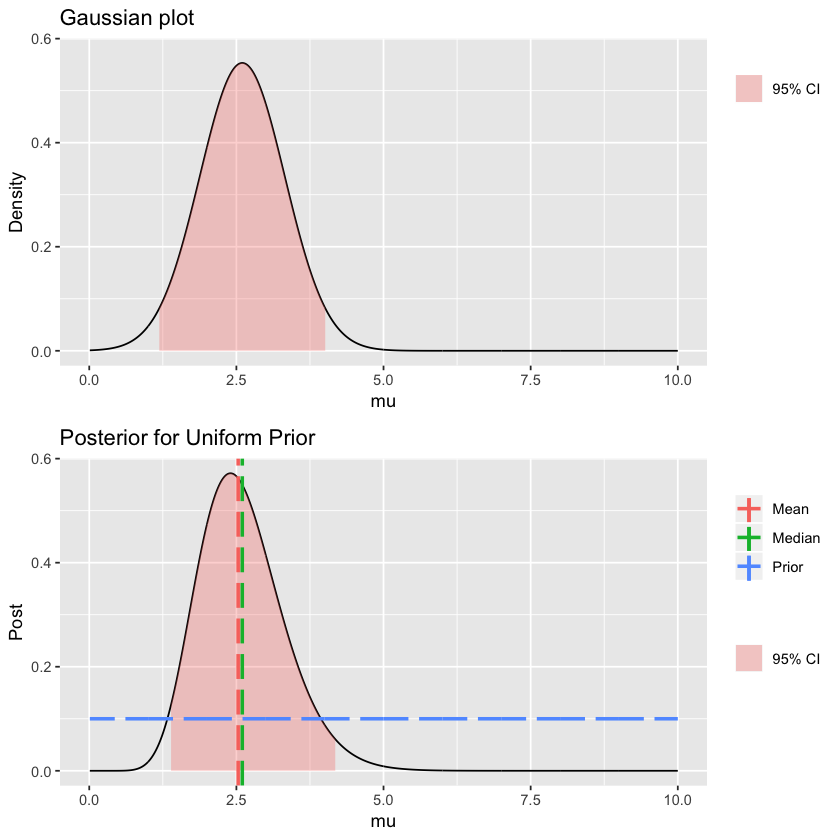

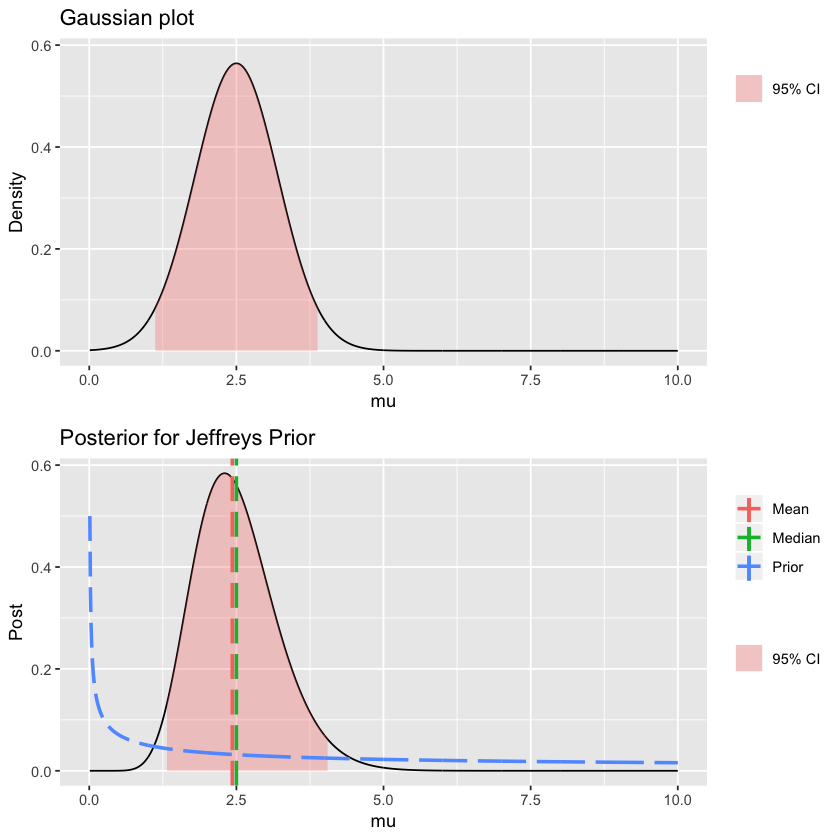

In [3]:
#Functions

FunPosterior <- function(data, mu) {
    return(FunLikelihood(data, mu)/
          integrate(FunLikelihood, lower=0, upper=10, data=data)$value)
}

FunLikelihood <- function(data, mu) {
   return(apply(sapply(data,dpois, mu), 1, prod))
}

Ext <- function(c, p, q) {
    x <- cumsum(c)/100
    s <- 0
    for (i in 1:(length(x)-1)) {
        if (x[i]<q & x[i+1]>q) {
            s <- p[i+1]
        }
    }
    return(s)    
} 

#Plots

Set <- c(4,1,3,1,3)
mu <- seq(0.01, 10, len=1000)

priors <- rbind(dunif(mu, min=0, max=10), 1/(20*sqrt(mu)))
alphas<- c(sum(Set)+1, sum(Set)+1/2)
title <-c('Posterior for Uniform Prior', 'Posterior for Jeffreys Prior')
n=length(Set)

for (i in 1:2) {  
    Post <- dgamma(mu, shape=alphas[i], rate=n)
    
    min <- Ext(Post, p=mu, q=0.025)
    max <- Ext(Post, p=mu, q=0.975)
    mean.Th <- alphas[i]/n
    mean.Num <- sum(Post*mu)/100
    variance.Th <- alphas[i]/n^2   
    variance.Num <- sum(Post*mu^2)/10-mean.Num
    median <-Ext(Post, p=mu, q=0.5)
    
    plot1 <-ggplot ()+
    geom_line(aes(x=mu, y=dnorm(mu, mean=mean.Th, sd=sqrt(variance.Th))))+
    geom_area(aes(x = ifelse(mu>qnorm(p=0.025, mean=mean.Th, sd= sqrt(variance.Th)) 
    & mu<qnorm(p=0.975, mean=mean.Th, sd= sqrt(variance.Th)), 
    mu, 0),
    y=dnorm(mu, mean=mean.Th, sd=sqrt(variance.Th)), fill='95% CI'), alpha=0.3)+
    ylim(0, max(Post))+
    theme(
    legend.position="right",
    legend.justification = c("right", "top"))+
    labs(y='Density', fill='', title='Gaussian plot')   
    
    plot2 <- ggplot()+
    geom_line(aes(x=mu, y=Post))+
    geom_area(aes(x = ifelse(mu>min & mu<max, mu, 0),
    y=Post, fill='95% CI'), alpha=0.3)+
    ylim(0, max(Post))+
    geom_vline(aes(xintercept = median, color='Mean'), linetype="longdash", size=1)+
    geom_vline(aes(xintercept = mean.Th, color='Median'), linetype="longdash", size=1)+
    geom_line(aes(x=mu, y=priors[i, ], color='Prior'), linetype='longdash', size=1)+
    theme(
    legend.position="right",
    legend.justification = c("right", "top"))+
    labs(fill='', colour='', title=title[i])
    
    grid.arrange(plot1, plot2, ncol=1)

}

# Exercise 2

In [ ]:
set.seed(1729)

#We will visualize the posterior using a 3D plot

#The true position is in (1,1)

n_d <- 100

Set <- rcauchy(n=n_d, loc=1, scale=1)

alpha.min <- -6
alpha.max <- 6
beta.min <- 0
beta.max <- 5

delta.a <- (alpha.max - alpha.min) / n_d
delta.b <- beta.max / n_d

alphas <- seq(from=alpha.min, by=delta.a, length.out=n_d+1)
betas <- seq(from=beta.min, by=delta.b, length.out=n_d+1)

logPosterior.F <- function (x_k, alfa, beta) {
    sum( log((beta/pi) / (beta^2 + (x_k - alfa)^2)) )
}

f <- function(a,b) logPosterior.F(Set, a, b)

logPosterior <- outer(alphas, betas, Vectorize(f))
PosteriorStar <- exp(logPosterior)
PosteriorStar <- PosteriorStar/(delta.a*delta.b*sum(PosteriorStar))

#Posterior over the dataset

plot1<- persp3D(x=alphas, y=betas, z=PosteriorStar, 
        ticktype='detailed',
        xlab='Alpha', ylab='Beta', zlab="",
        xlim=c(-6,6), ylim=c(0,5), zlim=c(0,max(PosteriorStar)),
        theta=45, phi=0)

#The red cross represets the true position

plot2 <- contour(alphas, betas, PosteriorStar, xlim=c(0, 2), ylim=c(0,2))+
         points(1,1, pch=3, col="red", lwd=1) 

In [ ]:
#Analysis over the first 1,2,5,10,25,50,75,100 sets of data

Sets <- c(1,2,5,10,25,50,75, 100)

par(mfrow = c(4,2))

for (n in Sets) {
    dt <- Set[1:n]
    f <- function(a,b) logPosterior.F(x_k=dt, a, b)

    logPosterior <- outer(alphas, betas, Vectorize(f))
    PosteriorStar <- exp(logPosterior)
    Posterior <- PosteriorStar/(delta.a*delta.b*sum(PosteriorStar))

    #The red cross represets the true position
    plot <-contour(alphas, betas, Posterior, xlim=c(-0.5, 5), ylim=c(0,5))+
    points(1,1, pch=3, col="red", lwd=1)   
}

# Exercise 3

In [ ]:
#Functions

signal <- function(x,a,b,x0,w,t) {
    t * (a * exp(-(x-x0)^2/(2*w^2))+b)
}

log.post <- function(d, x, a, b, x0, w, t) {
if(a<0 || b <0) {return(-Inf)} # the effect of the prior 
    sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
}

set.seed(1729)

x0 <-0

#Changing resolution

wSet <- c(0.1,0.25,1,2,3,100)
A.true <- 1
B.true <- 1
Delta.t <- 5

par(mfrow = c(3,2))

for (w in wSet) { 
    xdat <- seq(from=-7, to=7, by=0.5*w)
    s.true <- signal(xdat, A.true, B.true, x0, w, Delta.t) 
    ddat <- rpois(length(s.true), s.true)
    
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
    splot <- signal(xplot, A.true, B.true, x0, w, Delta.t) 
    
    Nsamp <- 100
    
    unigrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp)
    
    a.min <- 0.0
    b.min <- 0.5
    a.max <- 4.0
    b.max <- 1.5
    delta.a <- (a.max - a.min) / Nsamp
    delta.b <- (b.max - b.min) / Nsamp
    a <- a.min + (a.max - a.min)*unigrid
    b <- b.min + (b.max - b.min)*unigrid
    
    z<- matrix(data=NA, nrow=length(a), ncol=length(b))
    
    for (j in 1:length(a)) {
        for (k in 1:length(b)) {
            z[j,k] <-log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t)
        }
    } 
    
    z <- z-max(z)
    plot <- contour(a, b, exp(z), nlevels = 5,labcex = 0.5, lwd = 1, xlab="Amplitude ,A ", ylab="Background ,B", main=sprintf("w=%.2f", w))
    abline(v=1,h=1,col="red") 
}

In [ ]:
#Changing the A/B ratio

w <- 1

A.trues <- c (0.1,0.25,1,2,3,100)

par(mfrow = c(3,3))

for (A.true in A.trues) {
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdat, A.true, B.true, x0, w, Delta.t) 
    ddat <- rpois(length(s.true), s.true)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
    splot <- signal(xplot, A.true, B.true, x0, w, Delta.t) 
    Sampling <- 100
    unigrid <- seq(from=1/(2*Sampling), to=1-1/(2*Sampling), by=1/Sampling)
    a.min <- A.true-2
    a.max <- A.true+2
    delta.a <- (a.max - a.min) / Sampling
    a <- a.min + (a.max - a.min)*unigrid
    b.min <- 0.5
    b.max <- 1.5
    delta.b <- (b.max - b.min) / Sampling
    b <- b.min + (b.max - b.min)*unigrid  
    
    z<- matrix(data=NA, nrow=length(a), ncol=length(b))
    
    for (i in 1:length(a)) {
        for (j in 1:length(b)) {
            z[i,j] <-log.post(ddat, xdat, a[i], b[j], x0, w, Delta.t)
        }
    }
    
    z <- z-max(z)
    
    contour(a, b, exp(z), nlevels = 5, labcex = 0.5, lwd = 1, xlab="Amplitude ,A", ylab="Background ,B", main=sprintf("A=%.2f", A.true))
    abline(v=A.true,h=1,col="red")
}